**Reference**: <https://daviddalpiaz.github.io/appliedstats/categorical-predictors-and-interactions.html>

In [1]:
library(tidyverse)

mtcars %>% head()

-- Attaching packages ----------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts -------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


# 1. Dummy variables

We will be interested in 3 variables: `mpg`, `hp` and `am`

In [2]:
mpg_hp_slr <- lm(mpg ~ hp, data = mtcars)
summary(mpg_hp_slr)


Call:
lm(formula = mpg ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


`geom_smooth()` using formula 'y ~ x'



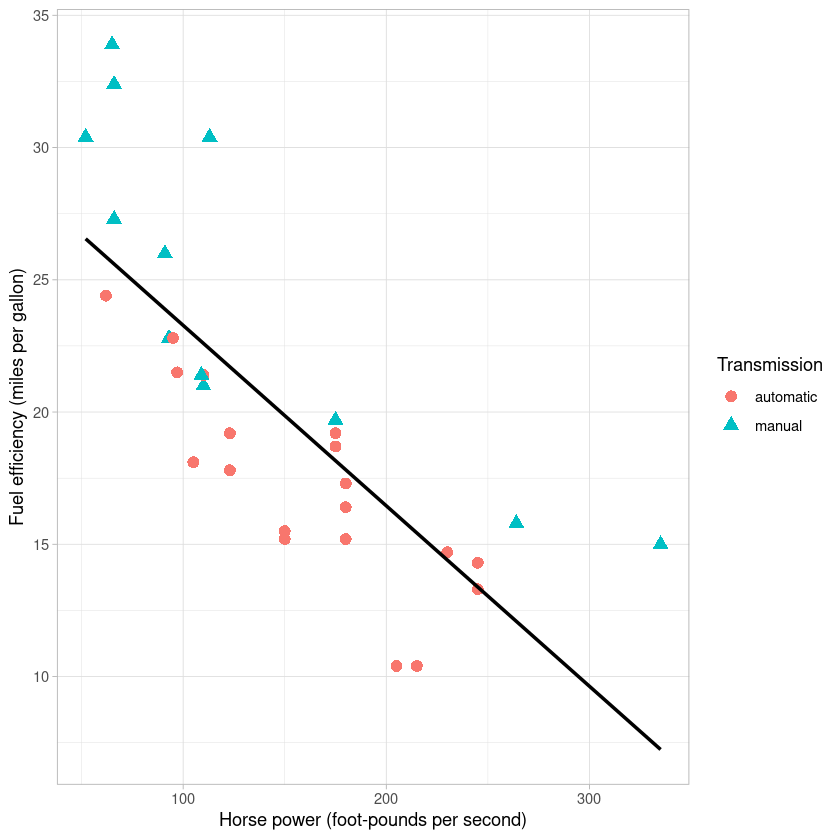

In [3]:
mtcars %>%
  ggplot(aes(hp, mpg)) +
  geom_point(aes(color = as_factor(am), shape = as_factor(am)), size = 3) +
  geom_smooth(method = "lm", se = F, color = "black") +
  labs(
    x = "Horse power (foot-pounds per second)",
    y = "Fuel efficiency (miles per gallon)"
  ) +
  scale_color_discrete("Transmission", breaks = 0:1, labels = c("automatic", "manual")) +
  scale_shape_discrete("Transmission", breaks = 0:1, labels = c("automatic", "manual")) +
  theme_light()

We can notice a pattern here. Automatic observations are mostly below the line and manual observations are mostly above the line. Which means we are overestimating fuel efficiency of automatic transmission cars and underestimating fuel efficiency of manual transmission cars. New model
$$ Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$$

For automatic transmission: $Y = \beta_0 + \beta_1 x_1 + \epsilon$  
For manual transmission: $Y = (\beta_0 + \beta_2) + \beta_1 x_1 + \epsilon$

In [4]:
mpg_hp_add <- lm(mpg  ~ hp + am, data = mtcars)

summary(mpg_hp_add)


Call:
lm(formula = mpg ~ hp + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3843 -2.2642  0.1366  1.6968  5.8657 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.584914   1.425094  18.655  < 2e-16 ***
hp          -0.058888   0.007857  -7.495 2.92e-08 ***
am           5.277085   1.079541   4.888 3.46e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.909 on 29 degrees of freedom
Multiple R-squared:  0.782,	Adjusted R-squared:  0.767 
F-statistic: 52.02 on 2 and 29 DF,  p-value: 2.55e-10


`geom_smooth()` using formula 'y ~ x'



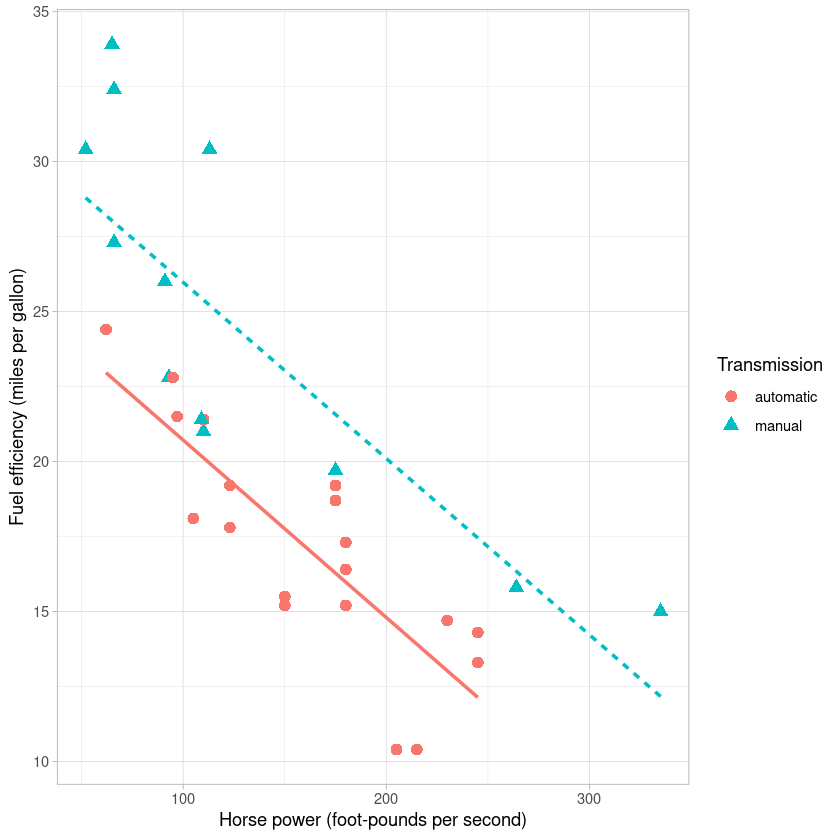

In [5]:
mtcars %>%
  mutate(am = as_factor(am)) %>% 
  ggplot(aes(hp, mpg, color = am, shape = am, linetype = am)) +
  geom_point(size = 3) +
  geom_smooth(method = "lm", se = F, show.legend = F) +
  labs(
    x = "Horse power (foot-pounds per second)",
    y = "Fuel efficiency (miles per gallon)"
  ) +
  scale_color_discrete("Transmission", breaks = 0:1, labels = c("automatic", "manual")) +
  scale_shape_discrete("Transmission", breaks = 0:1, labels = c("automatic", "manual")) +
  theme_light()


We can indeed see that the transmission type is significant:  
$H_0: \beta_2 = 0$  
$H_1: \beta_2 \ne 0$

In [6]:
summary(mpg_hp_add)$coefficients["am",,drop = F]


,Estimate,Std. Error,t value,Pr(>|t|)
am,5.277085,1.079541,4.88827,3.460318e-05


In [7]:
anova(mpg_hp_slr, mpg_hp_add)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,447.6743,NA,NA,NA,NA
2,29,245.4393,1,202.235,23.89518,3.460318e-05


Notice that these are indeed testing the same thing, as the p-values are exactly equal. (And the   F test statistic is the   t test statistic squared.)

**Interpretation**:

In [8]:
summary(mpg_hp_add)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),26.5849137,1.425094292,18.654845,1.073954e-17
hp,-0.0588878,0.007856745,-7.495191,2.920375e-08
am,5.2770853,1.079540576,4.888270,3.460318e-05


- $\hat{\beta_0}$ = 26.58 is the estimated average `mpg` for a car with automatic transmission and **0** `hp`
- $\hat{\beta_0} + \hat{\beta_2}$ = 31.86 is the estimated average `mpg` for a car with manual transmission and **0** `hp`
- $\hat{\beta_1}$ = -0.0588878 is the estimated average `mpg` change if we increase `hp` by 1, regarless the transmission type

# 2. Interaction

In [9]:
# read data frame from the web
autompg = read.table(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  quote = "\"",
  comment.char = "",
  stringsAsFactors = FALSE)
# give the dataframe headers
colnames(autompg) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name")
# remove missing data, which is stored as "?"
autompg = subset(autompg, autompg$hp != "?")
# remove the plymouth reliant, as it causes some issues
autompg = subset(autompg, autompg$name != "plymouth reliant")
# give the dataset row names, based on the engine, year and name
rownames(autompg) = paste(autompg$cyl, "cylinder", autompg$year, autompg$name)
# remove the variable for name
autompg = subset(autompg, select = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin"))
## change horsepower from character to numeric
autompg$hp = as.numeric(autompg$hp)
# create a dummary variable for foreign vs domestic cars. domestic = 1.
autompg$domestic = as.numeric(autompg$origin == 1)
# remove 3 and 5 cylinder cars (which are very rare.)
autompg = autompg[autompg$cyl != 5,]
autompg = autompg[autompg$cyl != 3,]
# the following line would verify the remaining cylinder possibilities are 4, 6, 8
#unique(autompg$cyl)
# change cyl to a factor variable
autompg$cyl = as.factor(autompg$cyl)

autompg <- as_tibble(autompg)

autompg %>% glimpse()

Rows: 383
Columns: 9
$ mpg      <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 24...
$ cyl      <fct> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, 4...
$ disp     <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 340...
$ hp       <dbl> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160...
$ wt       <dbl> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850...
$ acc      <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, 1...
$ year     <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70...
$ origin   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2...
$ domestic <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0...


We’ll now be concerned with three variables: `mpg`, `disp`, `and` `domestic`
- **Y** is mpg, the fuel efficiency in miles per gallon,
- $x_1$ is disp, the displacement in cubic inches,
- $x_2$ is domestic as described above, which is a dummy variable (1 for domestic and 0 for foreign)

In [10]:
# without interaction
mpg_disp_add <- lm(mpg~ disp + domestic, data = autompg)
summary(mpg_disp_add)


Call:
lm(formula = mpg ~ disp + domestic, data = autompg)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.559  -2.904  -0.576   2.434  18.814 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.486645   0.489885  72.439   <2e-16 ***
disp        -0.057251   0.002907 -19.696   <2e-16 ***
domestic    -1.300402   0.632372  -2.056   0.0404 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.506 on 380 degrees of freedom
Multiple R-squared:  0.6721,	Adjusted R-squared:  0.6704 
F-statistic: 389.5 on 2 and 380 DF,  p-value: < 2.2e-16


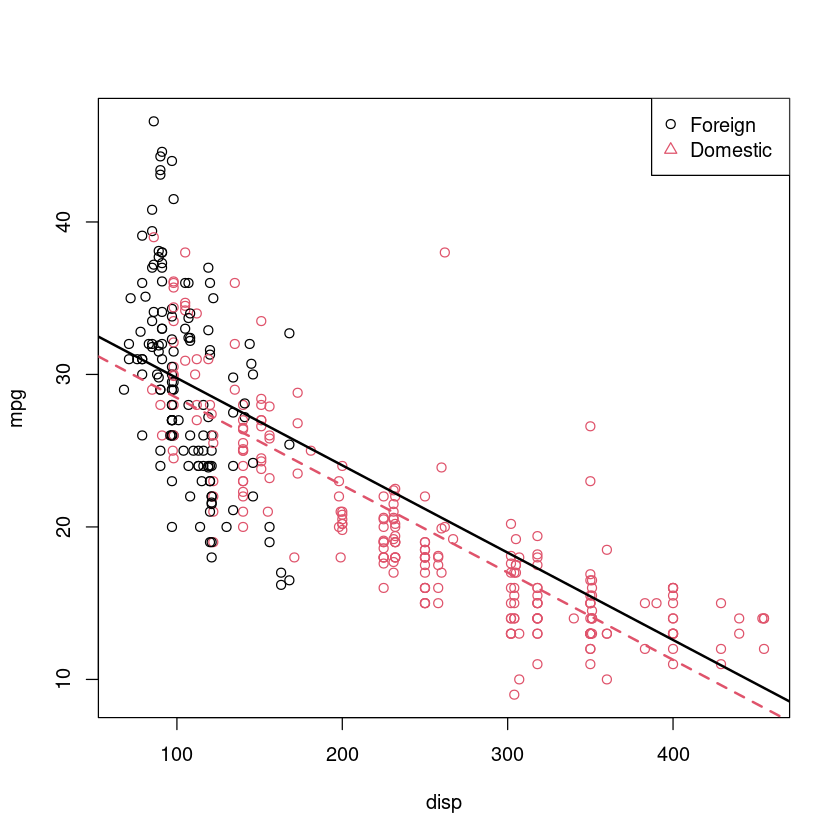

In [11]:
int_for = coef(mpg_disp_add)[1]
int_dom = coef(mpg_disp_add)[1] + coef(mpg_disp_add)[3]

slope_for = coef(mpg_disp_add)[2]
slope_dom = coef(mpg_disp_add)[2]
plot(mpg~disp, data = autompg, col = domestic + 1)
abline(int_for, slope_for, col = 1, lty = 1, lwd = 2) # add line for foreign cars
abline(int_dom, slope_dom, col = 2, lty = 2, lwd = 2) # add line for domestic cars
legend("topright", c("Foreign", "Domestic"), pch = c(1, 2), col = c(1, 2))

This is a model that allows for two parallel lines, meaning the mpg can be different on average between foreign and domestic cars of the same engine displacement, but the change in average mpg for an increase in displacement is the same for both. We can see this model isn’t doing very well here. The red line fits the red points fairly well, but the black line isn’t doing very well for the black points, it should clearly have a more negative slope. Essentially, we would like a model that allows for two different slopes.
$$ Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$$

For foreign cars, that is $x_2 = 0$: $Y = \beta_0 + \beta_1 x_1 + \epsilon$  
For domestic cars, that is $x_2 = 1$: $Y = (\beta_0 + \beta_2) + (\beta_1 + \beta_3) x_1 + \epsilon$

In [12]:
# with interaction, these 2 are equivalent
mpg_disp_int <- lm(mpg~disp+domestic+disp:domestic, data = autompg)
mpg_disp_int2 <- lm(mpg~disp*domestic, data = autompg)
summary(mpg_disp_int2)


Call:
lm(formula = mpg ~ disp * domestic, data = autompg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8332  -2.8956  -0.8332   2.2828  18.7749 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    46.05484    1.80582  25.504  < 2e-16 ***
disp           -0.15692    0.01668  -9.407  < 2e-16 ***
domestic      -12.57547    1.95644  -6.428 3.90e-10 ***
disp:domestic   0.10252    0.01692   6.060 3.29e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.308 on 379 degrees of freedom
Multiple R-squared:  0.7011,	Adjusted R-squared:  0.6987 
F-statistic: 296.3 on 3 and 379 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



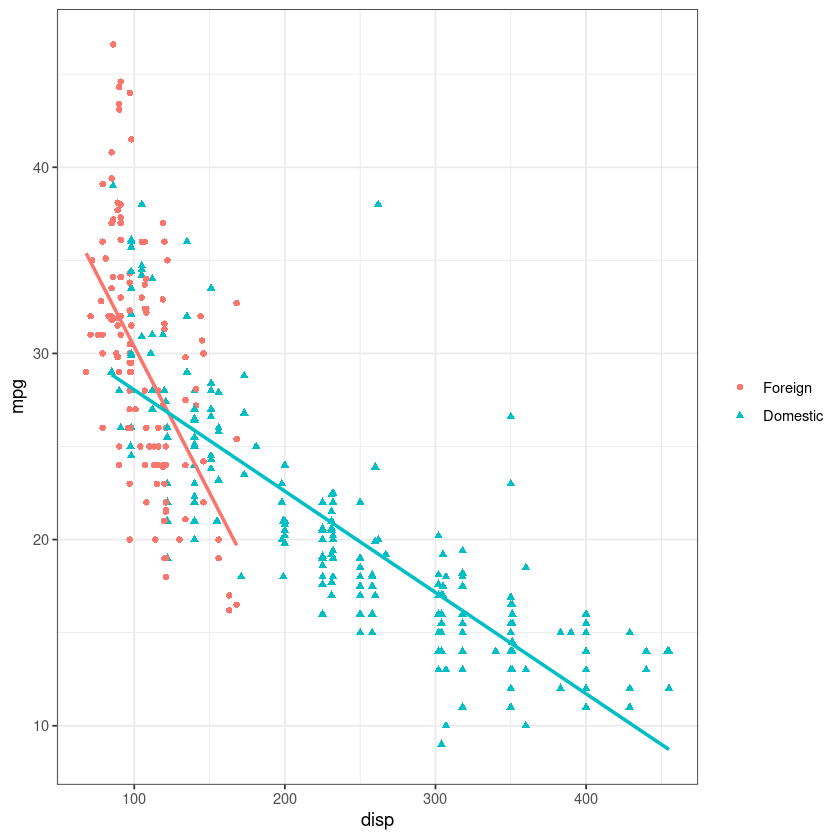

In [13]:
autompg %>%
  mutate(domestic = as_factor(domestic)) %>%
  ggplot(aes(disp, mpg, color = domestic, shape = domestic)) +
  geom_point() +
  geom_smooth(method = "lm", se = F, show.legend = F) +
  scale_color_discrete(NULL, breaks = 0:1, labels = c("Foreign", "Domestic")) +
  scale_shape_discrete(NULL, breaks = 0:1, labels = c("Foreign", "Domestic")) +
  theme_bw()

We can see that the interaction is significant:  
$H_0: \beta_3 = 0$  
$H_1: \beta_3 \ne 0$

In [14]:
# T-test
summary(mpg_disp_int2)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),46.0548423,1.80582144,25.503542,2.994691e-84
disp,-0.1569239,0.01668175,-9.406917,5.003569e-19
domestic,-12.5754714,1.95643931,-6.427734,3.896808e-10
disp:domestic,0.1025184,0.01691818,6.059659,3.293721e-09


In [15]:
# F-test, the same result as T-test
# See nested model in notebook: Multiple regression.ipynb
anova(mpg_disp_add, mpg_disp_int2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,380,7713.982,NA,NA,NA,NA
2,379,7032.625,1,681.3568,36.71946,3.293721e-09


When the interaction is significant, we can't not interpret the main effect (the significant of `disp` and `domestic`), so we stop here.

---
We can also consider interaction between 2 numeric variables

In [16]:
mpg_disp_add_hp <- lm(mpg~disp+hp, data = autompg)
mpg_disp_int_hp <- lm(mpg~disp*hp, data = autompg)

anova(mpg_disp_add_hp, mpg_disp_int_hp)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,380,7576.553,NA,NA,NA,NA
2,379,5754.232,1,1822.322,120.0264,1.887753e-24


p value is nearly 0 so the interaction is significant

In [17]:
summary(mpg_disp_int_hp)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),52.4081997848,1.522726733,34.41734,1.096565e-118
disp,-0.1001737655,0.006638249,-15.09039,1.256369e-40
hp,-0.2198199720,0.019869443,-11.06322,7.640761e-25
disp:hp,0.0005658269,0.000051647,10.95566,1.887753e-24


$beta_0$ =
52.4081998
  is the estimated average mpg for a car with 0 disp and 0 hp.  
$beta_1$
=
−
0.1001738
  is the estimated change in average mpg for an increase in 1 disp, for a car with 0 hp.  
$beta_2$
=
−
0.21982
  is the estimated change in average mpg for an increase in 1 hp, for a car with 0 disp.  
$beta_3$
=
$5.658269 x 10^{-4}$  is an estimate of the modification to the change in average mpg for an increase in disp, for a car of a certain hp (or vice versa).

# 3. Factor variables

R will automatically convert factor to dummy variables

In [18]:
mtcars %>% head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [19]:
mtcars %>%
mutate(cyl = as_factor(cyl)) %>%
lm(mpg~disp + cyl, data = .)


Call:
lm(formula = mpg ~ disp + cyl, data = .)

Coefficients:
(Intercept)         disp         cyl6         cyl8  
   29.53477     -0.02731     -4.78585     -4.79209  


## 3.1 Factor with more than 2 levels

In [20]:
autompg <- autompg %>% mutate(cyl = as.factor(cyl))

In [21]:
# without interaction
mpg_disp_add_cyl <- lm(mpg ~ disp + cyl, data = autompg)
summary(mpg_disp_add_cyl)


Call:
lm(formula = mpg ~ disp + cyl, data = autompg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6864  -2.6951  -0.3723   2.1677  20.3033 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.999293   0.822331  42.561  < 2e-16 ***
disp        -0.052173   0.006951  -7.505 4.41e-13 ***
cyl6        -3.633250   0.950452  -3.823 0.000154 ***
cyl8        -2.036031   1.722443  -1.182 0.237923    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.389 on 379 degrees of freedom
Multiple R-squared:  0.6897,	Adjusted R-squared:  0.6873 
F-statistic: 280.8 on 3 and 379 DF,  p-value: < 2.2e-16


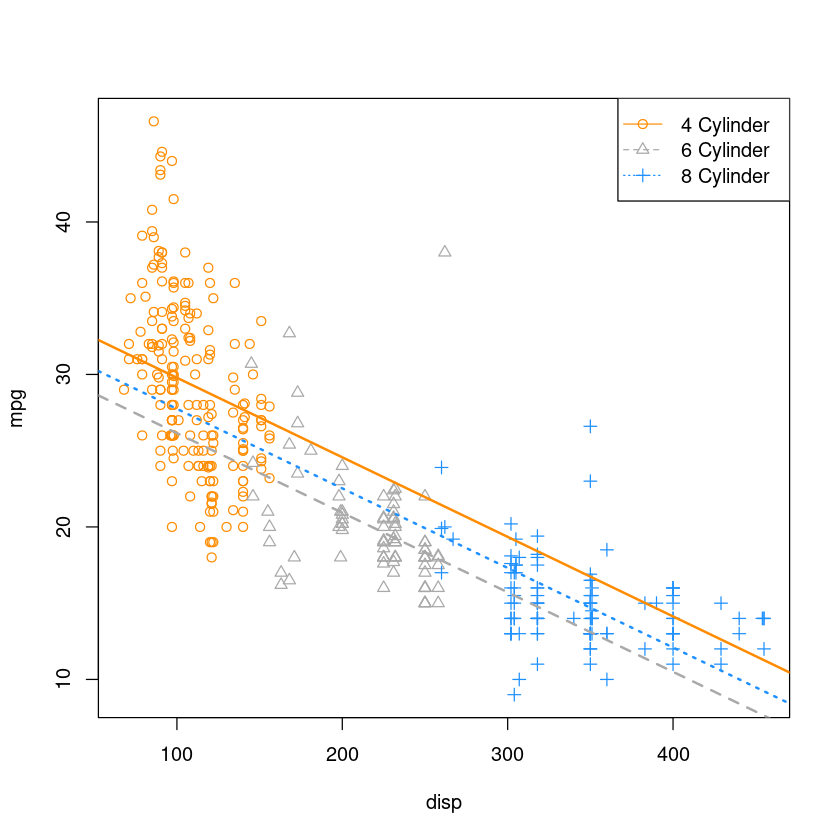

In [23]:
int_4cyl = coef(mpg_disp_add_cyl)[1]
int_6cyl = coef(mpg_disp_add_cyl)[1] + coef(mpg_disp_add_cyl)[3]
int_8cyl = coef(mpg_disp_add_cyl)[1] + coef(mpg_disp_add_cyl)[4]

slope_all_cyl = coef(mpg_disp_add_cyl)[2]

plot_colors = c("Darkorange", "Darkgrey", "Dodgerblue")
plot(mpg ~ disp, data = autompg, col = plot_colors[cyl], pch = as.numeric(cyl))
abline(int_4cyl, slope_all_cyl, col = plot_colors[1], lty = 1, lwd = 2)
abline(int_6cyl, slope_all_cyl, col = plot_colors[2], lty = 2, lwd = 2)
abline(int_8cyl, slope_all_cyl, col = plot_colors[3], lty = 3, lwd = 2)
legend("topright", c("4 Cylinder", "6 Cylinder", "8 Cylinder"),
       col = plot_colors, lty = c(1, 2, 3), pch = c(1, 2, 3))

In [22]:
# with interaction
mpg_disp_int_cyl <- lm(mpg ~ disp * cyl, data = autompg)
summary(mpg_disp_int_cyl)


Call:
lm(formula = mpg ~ disp * cyl, data = autompg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9133  -2.4642  -0.4301   2.1488  20.1082 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  43.59052    1.55595  28.015  < 2e-16 ***
disp         -0.13069    0.01396  -9.362  < 2e-16 ***
cyl6        -13.20026    3.49865  -3.773 0.000187 ***
cyl8        -20.85706    3.44362  -6.057 3.36e-09 ***
disp:cyl6     0.08299    0.01991   4.168 3.81e-05 ***
disp:cyl8     0.10817    0.01651   6.550 1.89e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.169 on 377 degrees of freedom
Multiple R-squared:  0.7215,	Adjusted R-squared:  0.7178 
F-statistic: 195.4 on 5 and 377 DF,  p-value: < 2.2e-16


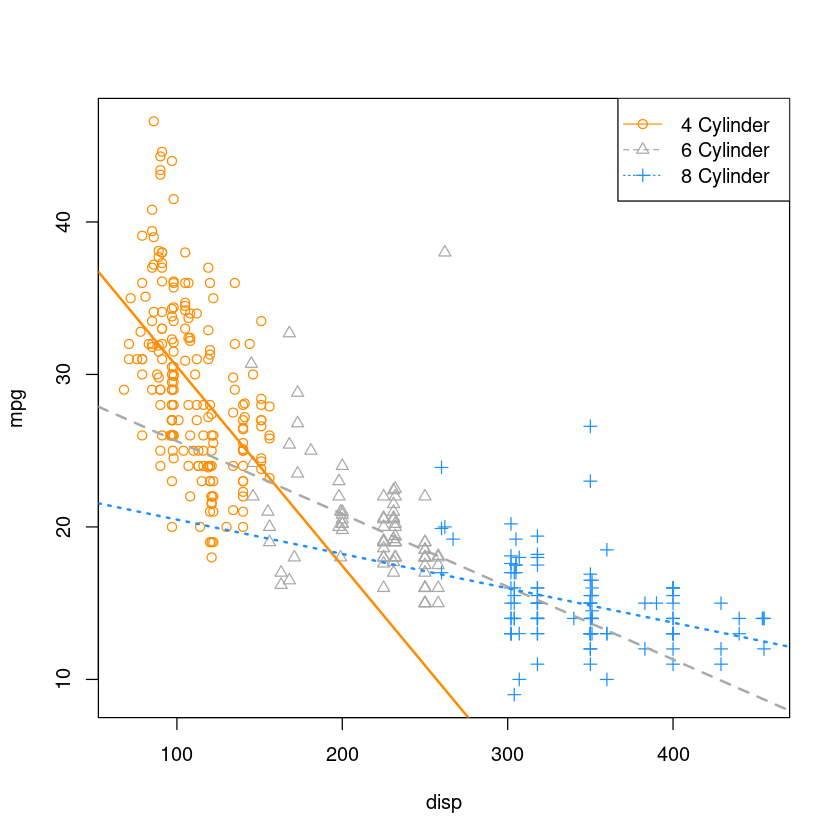

In [24]:
int_4cyl = coef(mpg_disp_int_cyl)[1]
int_6cyl = coef(mpg_disp_int_cyl)[1] + coef(mpg_disp_int_cyl)[3]
int_8cyl = coef(mpg_disp_int_cyl)[1] + coef(mpg_disp_int_cyl)[4]

slope_4cyl = coef(mpg_disp_int_cyl)[2]
slope_6cyl = coef(mpg_disp_int_cyl)[2] + coef(mpg_disp_int_cyl)[5]
slope_8cyl = coef(mpg_disp_int_cyl)[2] + coef(mpg_disp_int_cyl)[6]

plot_colors = c("Darkorange", "Darkgrey", "Dodgerblue")
plot(mpg ~ disp, data = autompg, col = plot_colors[cyl], pch = as.numeric(cyl))
abline(int_4cyl, slope_4cyl, col = plot_colors[1], lty = 1, lwd = 2)
abline(int_6cyl, slope_6cyl, col = plot_colors[2], lty = 2, lwd = 2)
abline(int_8cyl, slope_8cyl, col = plot_colors[3], lty = 3, lwd = 2)
legend("topright", c("4 Cylinder", "6 Cylinder", "8 Cylinder"),
       col = plot_colors, lty = c(1, 2, 3), pch = c(1, 2, 3))

This looks much better! We can see that for medium displacement cars, 6 cylinder cars now perform better than 8 cylinder cars, which seems much more reasonable than before.

To completely justify the interaction model (i.e., a unique slope for each cyl level) compared to the additive model (single slope), we can perform an   F -test. Notice first, that there is no   t -test that will be able to do this since the difference between the two models is not a single parameter.

Null model: $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$  
Full model: $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_1 x_2 + \beta_5 x_1 x_3 + \epsilon$


$H_0: \beta_4 = \beta_5 = 0$

In [26]:
# is the interaction significant?
# nested model
anova(mpg_disp_add_cyl, mpg_disp_int_cyl)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,379,7299.525,NA,NA,NA,NA
2,377,6551.732,2,747.7931,21.51477,1.419369e-09


As expected, we see a very low p-value, and thus reject the null (which states that the interaction is not significant). We prefer the interaction model over the additive model.

# 4. Parameterization

How to manually create dummy variables and what pitfalls you should avoid? Read the book

# 5. Building larger models

When we use three-way interaction term, we also use all possible two-way interactions, as well as each of the first order (main effect) terms. This is the concept of a hierarchy
**hierarchy**: Any time a “higher-order” term is in a model, the related “lower-order” terms should also be included. Mathematically their inclusion or exclusion is sometimes irrelevant, but from an interpretation standpoint, it is best to follow the hierarchy rules.

We often avoid three-way interaction term or higher because it's hard to interpret

Read the book for further information

$H_0: \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_1 x_2 + \beta_5 x_1 x_3 + \beta_6 x_2 x_3 + \epsilon$  
$H_1: \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_1 x_2 + \beta_5 x_1 x_3 + \beta_6 x_2 x_3 + \beta_7 x_1 x_2 x_3 + \epsilon$

In [28]:
# is the three way interaction signicant?
# H_0: beta_7 = 0
# H_1: beta_7 != 0
two_way_int_mod = lm(mpg ~ disp * hp + disp * domestic + hp * domestic, data = autompg)
big_model = lm(mpg ~ disp * hp * domestic, data = autompg)

anova(two_way_int_mod, big_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,376,5673.222,NA,NA,NA,NA
2,375,5645.623,1,27.59914,1.833222,0.1765629


p-value is large, so we fail to reject $H_0$

---
A quick note here: the full model does still “fit better.” Notice that it has a smaller RMSE than the null model, which means the full model makes smaller (squared) errors on average.

In [30]:
mean(resid(big_model)^2)
mean(resid(two_way_int_mod)^2)

[1] 14.74053

[1] 14.81259

However, it is not much smaller. We could even say that, the difference is insignificant. This is an idea we will return to later in greater detail.

Now that we have chosen the model without the three-way interaction, can we go further? Do we need the two-way interactions? Let’s test  
$H_0: \beta_4 = \beta_5 = \beta_6 = 0$

In [32]:
additive_mod <- lm(mpg ~ disp + hp + domestic, data = autompg)

anova(additive_mod, two_way_int_mod)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,379,7369.683,NA,NA,NA,NA
2,376,5673.222,3,1696.461,37.47837,3.272354e-21


Here the p-value is small, so we reject the null, and we prefer the full (alternative) model. Of the models we have considered, our final preference is for  
$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_1 x_2 + \beta_5 x_1 x_3 + \beta_6 x_2 x_3 + \epsilon$  

# Exercises

### Exercise 1

Solution to exercise 1 from this: <https://www.studocu.com/en-us/document/university-of-illinois-at-urbana-champaign/methods-of-applied-statistics/assignments/homework-5-solution/1892002/view>

In [3]:
epa2015 <- read_csv("https://raw.githubusercontent.com/alokkshukla/STAT420/master/HW8/epa2015.csv")

epa2015 %>% glimpse()


-- Column specification ----------------------------------------------------------------------------------------------------------------------------------------------------------------------
cols(
  Make = col_character(),
  Model = col_character(),
  ID = col_character(),
  disp = col_double(),
  type = col_character(),
  horse = col_double(),
  cyl = col_double(),
  lockup = col_character(),
  drive = col_character(),
  weight = col_double(),
  axleratio = col_double(),
  nvratio = col_double(),
  THC = col_double(),
  CO = col_double(),
  CO2 = col_double(),
  mpg = col_double()
)




Rows: 4,411
Columns: 16
$ Make      <chr> "aston martin", "aston martin", "aston martin", "aston ma...
$ Model     <chr> "DB9", "DB9", "Rapide S", "Rapide S", "V12 Vantage S", "V...
$ ID        <chr> "143TT1042", "143TT1042", "410TT4202", "410TT4202", "288T...
$ disp      <dbl> 5.900, 5.900, 6.000, 6.000, 6.000, 6.000, 4.700, 4.700, 4...
$ type      <chr> "Car", "Car", "Car", "Car", "Car", "Car", "Car", "Car", "...
$ horse     <dbl> 510, 510, 552, 552, 565, 565, 420, 420, 430, 430, 568, 56...
$ cyl       <dbl> 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 12, 12, 4, 4, 4, 4, 4...
$ lockup    <chr> "Y", "Y", "Y", "Y", "Y", "Y", "N", "N", "Y", "Y", "Y", "Y...
$ drive     <chr> "R", "R", "R", "R", "R", "R", "R", "R", "R", "R", "R", "R...
$ weight    <dbl> 4500, 4500, 4750, 4750, 4250, 4250, 4000, 4000, 4000, 400...
$ axleratio <dbl> 3.46, 3.46, 2.73, 2.73, 3.73, 3.73, 3.91, 3.91, 4.18, 4.1...
$ nvratio   <dbl> 31.0, 31.0, 22.4, 22.4, 33.6, 33.6, 38.6, 38.6, 36.2, 36....
$ THC       <dbl> 0.02510, 0

In [4]:
# convert column `type` to factor
epa2015$type <- as.factor(epa2015$type)

is.factor(epa2015$type)

[1] TRUE

type,n
<fct>,<int>
Both,636
Car,2730
Truck,1045


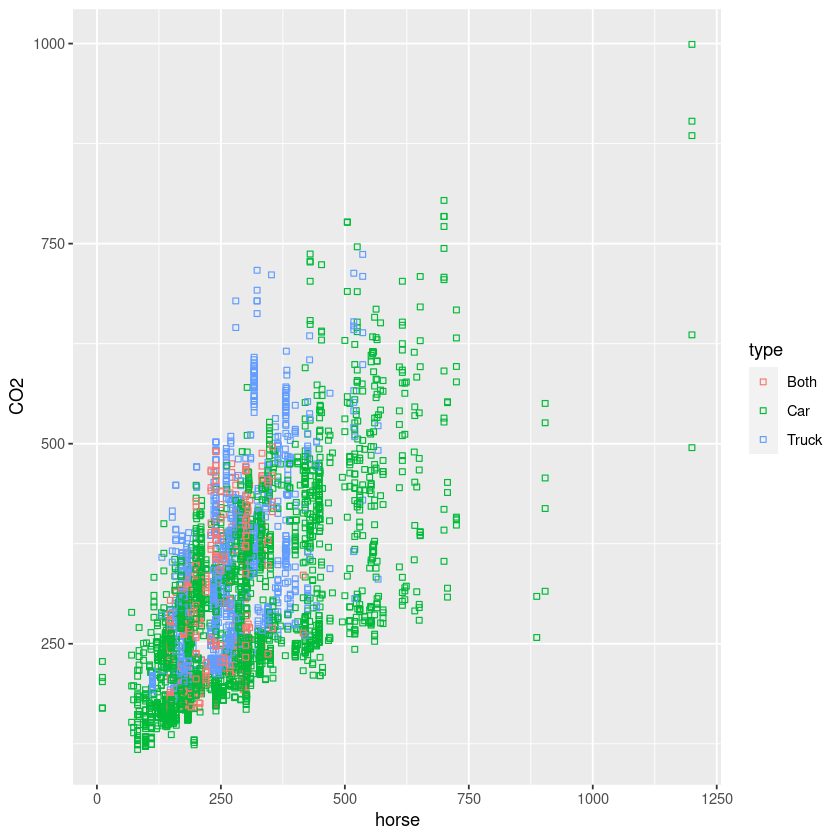

In [5]:
epa2015 %>% 
	ggplot(aes(horse, CO2, color = type)) +
	geom_point(shape = 22)

epa2015 %>% count(type)


Call:
lm(formula = CO2 ~ horse, data = epa2015)

Residuals:
    Min      1Q  Median      3Q     Max 
-384.71  -71.50    2.07   56.24  384.36 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 154.71785    3.27876   47.19   <2e-16 ***
horse         0.54990    0.01074   51.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 89.11 on 4409 degrees of freedom
Multiple R-squared:  0.373,	Adjusted R-squared:  0.3728 
F-statistic:  2623 on 1 and 4409 DF,  p-value: < 2.2e-16


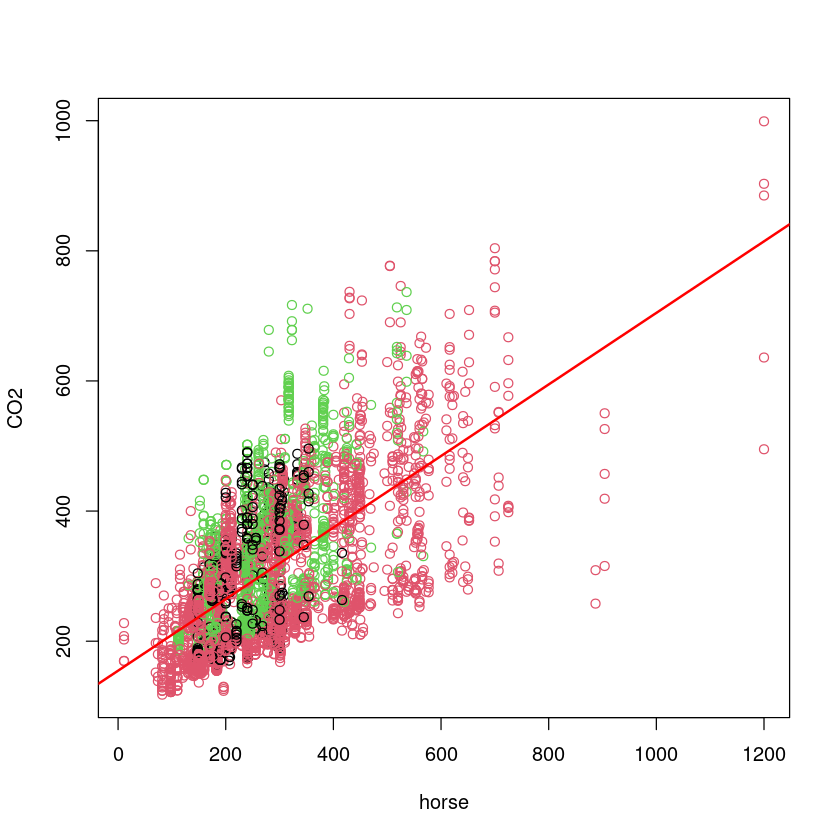

In [6]:
# simple linear regression model
mod <- lm(CO2 ~ horse, data = epa2015)

summary(mod)

plot(CO2 ~ horse, data = epa2015, col = epa2015$type)
abline(coef(mod), lwd = 2, col = "red")

[1] 0.5611008


Call:
lm(formula = CO2 ~ horse + type, data = epa2015)

Residuals:
    Min      1Q  Median      3Q     Max 
-373.48  -68.15    4.61   57.97  362.17 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 155.98215    4.22025  36.960  < 2e-16 ***
horse         0.56110    0.01036  54.184  < 2e-16 ***
typeCar     -22.42507    3.78332  -5.927 3.31e-09 ***
typeTruck    40.07444    4.30086   9.318  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 85.29 on 4407 degrees of freedom
Multiple R-squared:  0.4259,	Adjusted R-squared:  0.4256 
F-statistic:  1090 on 3 and 4407 DF,  p-value: < 2.2e-16


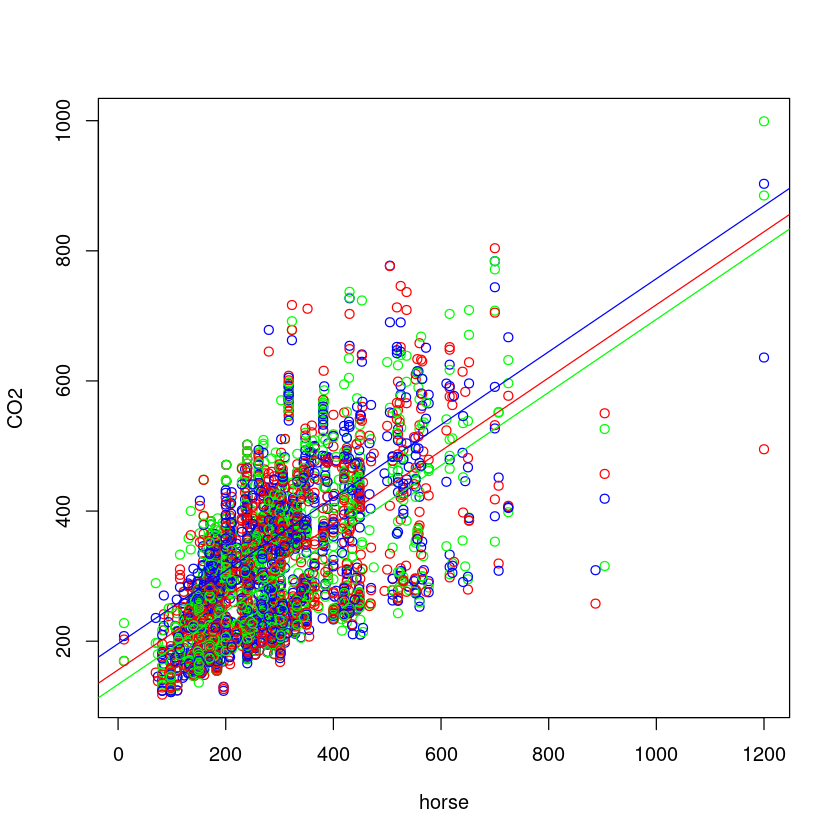

In [11]:
# additive model
mod_type_add <- lm(CO2 ~ horse + type, data = epa2015)
coef_add <- coef(mod_type_add)

type_col <- c("red", "green", "orange")
plot(CO2 ~ horse, data = epa2015, col = set_names(c("red", "green", "blue"), levels(epa2015$type)))
abline(coef_add[[1]], coef_add[[2]],  col = "red")
abline(coef_add[[1]] + coef_add[[3]], coef_add[[2]], col = "green")
abline(coef_add[[1]] + coef_add[[4]], coef_add[[2]], col = "blue")

coef_add[[2]]

summary(mod_type_add)

In [20]:
#an estimate for the average change in  CO2  for a one foot-pound persecond increase in  horse  for a vehicle of type  truck
# by using addictive model
coef_add[[2]]

[1] 0.5611008

In [12]:
predict(mod_type_add, tibble(horse = 148, type = "Both"), interval = "prediction")

,fit,lwr,upr
1,239.0251,71.67975,406.3704



Call:
lm(formula = CO2 ~ horse * type, data = epa2015)

Residuals:
    Min      1Q  Median      3Q     Max 
-362.77  -67.31    5.36   57.66  364.71 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     149.89712   15.20149   9.861   <2e-16 ***
horse             0.58606    0.06080   9.640   <2e-16 ***
typeCar         -11.17958   15.62010  -0.716   0.4742    
typeTruck         7.66404   17.72943   0.432   0.6656    
horse:typeCar    -0.04286    0.06180  -0.693   0.4881    
horse:typeTruck   0.11533    0.06863   1.680   0.0929 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 85.09 on 4405 degrees of freedom
Multiple R-squared:  0.4288,	Adjusted R-squared:  0.4282 
F-statistic: 661.4 on 5 and 4405 DF,  p-value: < 2.2e-16


[1] 0.7013883

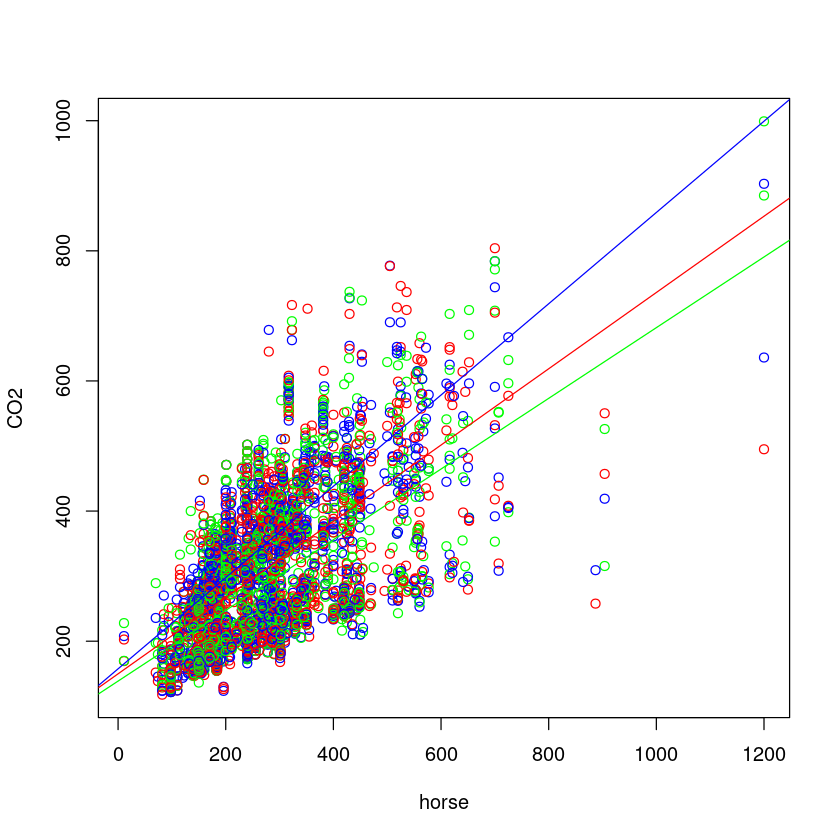

In [13]:
mod_type_int <- lm(CO2 ~ horse * type, data = epa2015)
summary(mod_type_int)

coef_int <- coef(mod_type_int)

plot(CO2 ~ horse, data = epa2015, col = set_names(c("red", "green", "blue"), levels(epa2015$type)))
abline(coef_int[[1]], coef_int[[2]], col = "red")
abline(coef_int[[1]] + coef_int[[3]], coef_int[[2]] + coef_int[[5]], col = "green")
abline(coef_int[[1]] + coef_int[[4]], coef_int[[2]] + coef_int[[6]], col = "blue")

coef_int[[2]] + coef_int[[6]]

In [19]:
# an estimate for the average change in  CO2  for a one foot-pound persecond increase in  horse  for a vehicle of type  truck 
# by using interaction model
coef_int[[2]] + coef_int[[6]]

[1] 0.7013883

In [18]:
# 95% prediction interval for a specific car by using interaction model
predict(mod_type_int, tibble(horse = 148, type = "Both"), interval = "prediction")

,fit,lwr,upr
1,236.6339,69.29175,403.9761


In [15]:
# compare SLR vs additive model, is the effect of `type` significant?
anova(mod, mod_type_add)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4409,35012540,NA,NA,NA,NA
2,4407,32054899,2,2957641,203.3125,3.480054e-85


p value is small, almost 0, so we reject $H_0$

In [16]:
# compare additive model vs interaction model, is the effect of interaction significant
anova(mod_type_add, mod_type_int)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4407,32054899,NA,NA,NA,NA
2,4405,31894278,2,160621,11.09189,1.566547e-05


p value is small, so we reject $H_0$, concludes that the effect of interaction is significant

**Conclusion**: The interaction model seems to perform best, so it is prefered

### Exercise 2

Solution for exercise 2 from this: <https://www.studocu.com/en-us/document/university-of-illinois-at-urbana-champaign/methods-of-applied-statistics/assignments/homework-5-solution/1892002/view>

In [21]:
hospital <- read_csv("https://raw.githubusercontent.com/alokkshukla/STAT420/master/HW8/hospital.csv")

hospital <- hospital %>% mutate(across(where(is.character), as.factor))

hospital %>% glimpse()


-- Column specification ----------------------------------------------------------------------------------------------------------------------------------------------------------------------
cols(
  Days = col_double(),
  Age = col_double(),
  Sex = col_character(),
  Comorbidity = col_character(),
  EdYears = col_double(),
  Education = col_character(),
  Income = col_character(),
  Charges = col_double(),
  Care = col_character(),
  Race = col_character(),
  Pressure = col_double(),
  Blood = col_double(),
  Rate = col_double()
)




Rows: 580
Columns: 13
$ Days        <dbl> 8, 14, 21, 4, 11, 9, 25, 26, 9, 16, 7, 3, 5, 45, 73, 62...
$ Age         <dbl> 42.25897, 63.66299, 41.52197, 41.95999, 52.09000, 59.40...
$ Sex         <fct> female, female, male, male, male, male, female, female,...
$ Comorbidity <fct> no, no, yes, yes, yes, yes, yes, no, yes, yes, yes, yes...
$ EdYears     <dbl> 11, 22, 18, 16, 8, 12, 12, 13, 16, 30, 20, 12, 12, 15, ...
$ Education   <fct> low, high, high, high, low, low, low, high, high, high,...
$ Income      <fct> high, high, high, high, high, high, low, high, high, hi...
$ Charges     <dbl> 9914, 283303, 320843, 4173, 13414, 19852, 84901, 207902...
$ Care        <fct> low, high, high, low, low, low, low, high, low, low, lo...
$ Race        <fct> non-white, white, white, white, white, white, white, wh...
$ Pressure    <dbl> 84, 69, 66, 97, 89, 57, 99, 115, 93, 102, 120, 87, 102,...
$ Blood       <dbl> 11.2988281, 30.0976562, 0.1999817, 10.7988281, 6.399414...
$ Rate        <dbl> 94, 108, 1

In [22]:
# addictive model
days_add <- lm(Days ~ Charges + Pressure + Care + Race, data = hospital)
summary(days_add)


Call:
lm(formula = Days ~ Charges + Pressure + Care + Race, data = hospital)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.792  -5.003  -1.463   3.098 133.017 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.850e+00  2.936e+00  -1.311   0.1903    
Charges      1.909e-04  9.580e-06  19.926  < 2e-16 ***
Pressure     1.032e-01  2.625e-02   3.931 9.48e-05 ***
Carelow     -9.646e-02  1.545e+00  -0.062   0.9502    
Racewhite    3.069e+00  1.652e+00   1.858   0.0637 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.45 on 575 degrees of freedom
Multiple R-squared:  0.4749,	Adjusted R-squared:  0.4713 
F-statistic:   130 on 4 and 575 DF,  p-value: < 2.2e-16


In [23]:
levels(hospital$Care)
levels(hospital$Race)

[1] "high" "low"

[1] "non-white" "white"

R chose 
- "high" as reference level for `Care`
- "non-white" as reference level for `Race`

In [24]:
# Fit a multiple regression model with  Days  as the response. 
# Use the main effects of  Charges ,Pressure ,  Care , and  Race , as well as the interaction of  Care 
# with each of the numericpredictors as predictors

days_int <- lm(Days ~ Care * (Charges + Pressure) + Race, data = hospital)
summary(days_int)


Call:
lm(formula = Days ~ Care * (Charges + Pressure) + Race, data = hospital)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.913  -4.482  -1.276   2.989 136.087 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -6.773e+00  3.288e+00  -2.060   0.0398 *  
Carelow           8.378e+00  5.059e+00   1.656   0.0983 .  
Charges           1.847e-04  9.872e-06  18.705  < 2e-16 ***
Pressure          1.453e-01  3.199e-02   4.543 6.78e-06 ***
Racewhite         3.036e+00  1.641e+00   1.850   0.0648 .  
Carelow:Charges   8.116e-05  3.727e-05   2.178   0.0298 *  
Carelow:Pressure -1.214e-01  5.501e-02  -2.207   0.0277 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.34 on 573 degrees of freedom
Multiple R-squared:  0.4837,	Adjusted R-squared:  0.4783 
F-statistic: 89.46 on 6 and 573 DF,  p-value: < 2.2e-16


In [26]:
# Use a statistical test to compare this model to the additive model (F-test)
anova(days_add, days_int)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,575,155596.2,NA,NA,NA,NA
2,573,152996.0,2,2600.218,4.869163,0.008000516


p value is small (less than 0.01) so the interaction specified is significant, prefer this model than the additive model

In [27]:
#  the interaction of  Race  with each of the numeric predictors.
# the interaction of Care with each of the numeric predictors
days_race_int <- lm(Days ~ Race * (Charges + Pressure) + Care * (Charges + Pressure), data = hospital)
summary(days_race_int)


Call:
lm(formula = Days ~ Race * (Charges + Pressure) + Care * (Charges + 
    Pressure), data = hospital)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.663  -4.285  -1.092   2.950 127.167 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.016e+00  5.264e+00  -0.573   0.5669    
Racewhite          -1.490e+00  5.595e+00  -0.266   0.7901    
Charges             1.143e-04  1.840e-05   6.212 1.01e-09 ***
Pressure            1.468e-01  5.470e-02   2.683   0.0075 ** 
Carelow             7.554e+00  4.992e+00   1.513   0.1308    
Racewhite:Charges   8.998e-05  1.996e-05   4.509 7.90e-06 ***
Racewhite:Pressure -4.374e-03  5.928e-02  -0.074   0.9412    
Charges:Carelow     9.088e-05  3.705e-05   2.453   0.0145 *  
Pressure:Carelow   -1.146e-01  5.420e-02  -2.114   0.0349 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.08 on 571 degrees of freedom
Multiple R-squared:  0.5015,	Adjusted 

In [28]:
# this model is more powerful than the previous one
anova(days_int, days_race_int)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,573,152996.0,NA,NA,NA,NA
2,571,147729.6,2,5266.37,10.17771,4.53775e-05


In [33]:
days_race_int %>% broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.015761e+00,5.264064e+00,-0.57289608,5.669406e-01
Racewhite,-1.489780e+00,5.594737e+00,-0.26628247,7.901178e-01
Charges,1.142872e-04,1.839661e-05,6.21240417,1.006058e-09
Pressure,1.467720e-01,5.469563e-02,2.68343122,7.498404e-03
Carelow,7.553561e+00,4.992366e+00,1.51302230,1.308273e-01
Racewhite:Charges,8.998112e-05,1.995504e-05,4.50919174,7.900784e-06
Racewhite:Pressure,-4.374426e-03,5.928273e-02,-0.07378922,9.412039e-01
Charges:Carelow,9.088306e-05,3.705434e-05,2.45269688,1.447704e-02
Pressure:Carelow,-1.145932e-01,5.420038e-02,-2.11425093,3.492668e-02


In [35]:
coefs_ <- coef(days_race_int)

#  an estimate of the change in average  Days  for a one-unitincrease in  Pressure  for a  "white"  patient that required a high level of care
unname(coefs_[7] + coefs_[4])

[1] 0.1423975

In [37]:
# a model using the four predictors that we have been considering that is more flexible than all of the above
full_mod <- lm(Days ~ Race * Care * Pressure * Charges, data = hospital)
anova(days_race_int, full_mod)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,571,147729.6,NA,NA,NA,NA
2,564,128445.1,7,19284.56,12.09688,1.969043e-14
